Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

Data Collection

In [2]:
a=pd.read_csv(r"D:\DATA SCIENCE\data science\2. Logistic-Regression\titanic_train.csv")

Exploratory Data Analysis

In [3]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     861 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking Null values
a.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked        30
dtype: int64

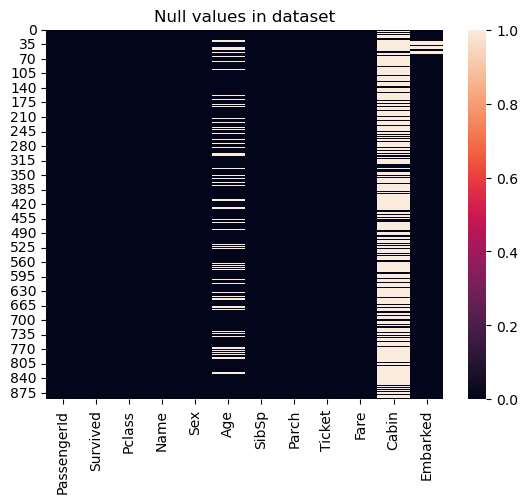

In [6]:
sns.heatmap(a.isnull())
plt.title('Null values in dataset')
plt.show()

In [7]:
# checking avg age
print(a.groupby('Sex')['Age'].describe())

        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


In [8]:
# checking avg age
print(a.groupby('Pclass')['Age'].describe())

        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0


In [9]:
# Dropping unnecessary variables
a.drop(['PassengerId','Name','Embarked','Cabin','Ticket'],axis=1,inplace=True)

Data Visualization

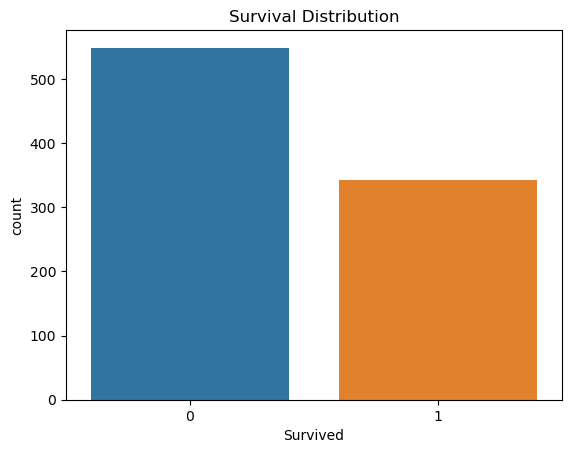

In [10]:
sns.countplot(x='Survived', data=a)
plt.title('Survival Distribution')
plt.show()

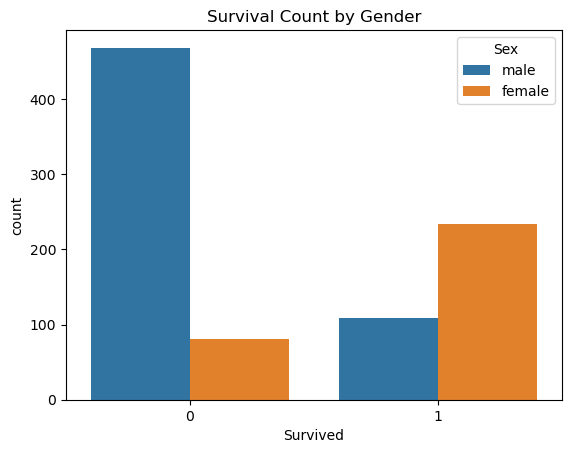

In [11]:
sns.countplot(x='Survived', hue='Sex', data=a)
plt.title('Survival Count by Gender')
plt.show()

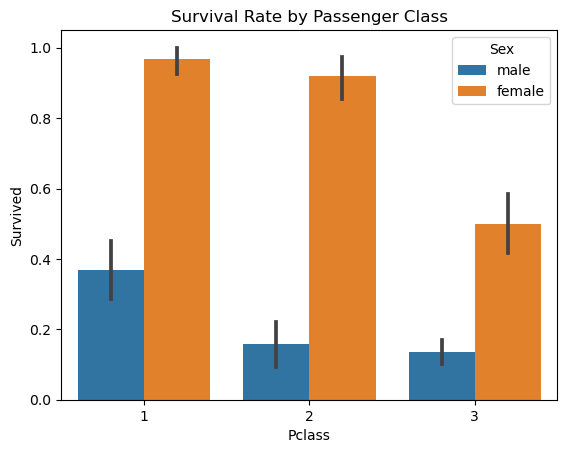

In [12]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=a)
plt.title('Survival Rate by Passenger Class')
plt.show()

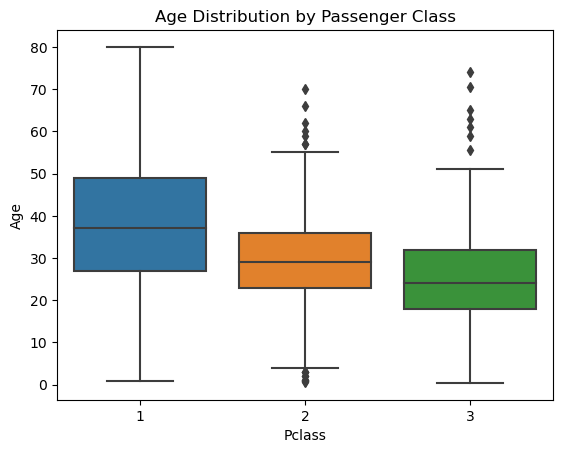

In [13]:
sns.boxplot(x='Pclass', y='Age', data=a)
plt.title('Age Distribution by Passenger Class')
plt.show()

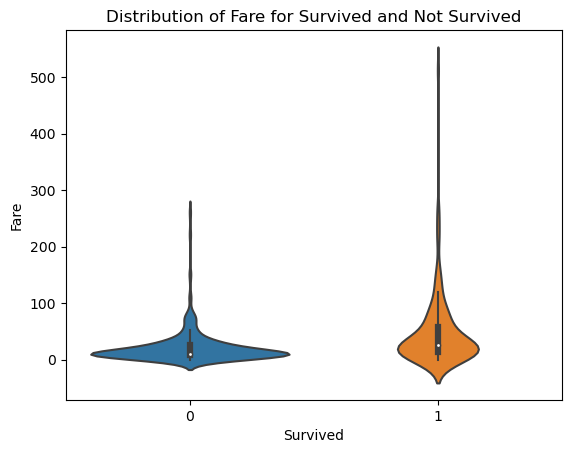

In [14]:
sns.violinplot(x='Survived', y='Fare', data=a)
plt.title('Distribution of Fare for Survived and Not Survived')
plt.show()

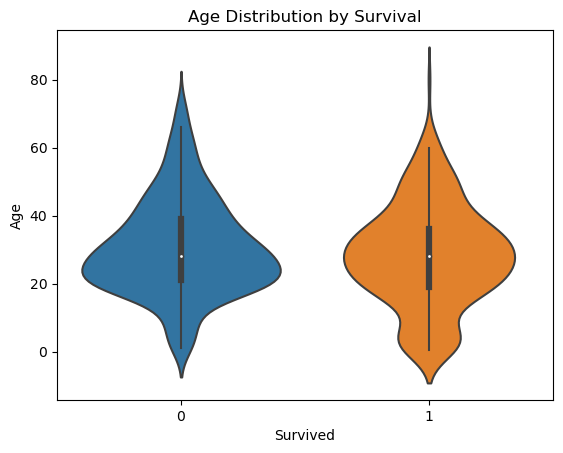

In [15]:
sns.violinplot(x='Survived', y='Age', data=a)
plt.title('Age Distribution by Survival')
plt.show()

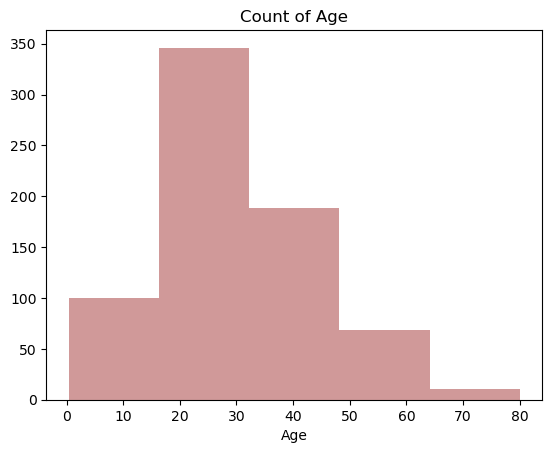

In [16]:
sns.distplot(a['Age'].dropna(),kde=False,color='darkred',bins=5)
plt.title('Count of Age')
plt.show()

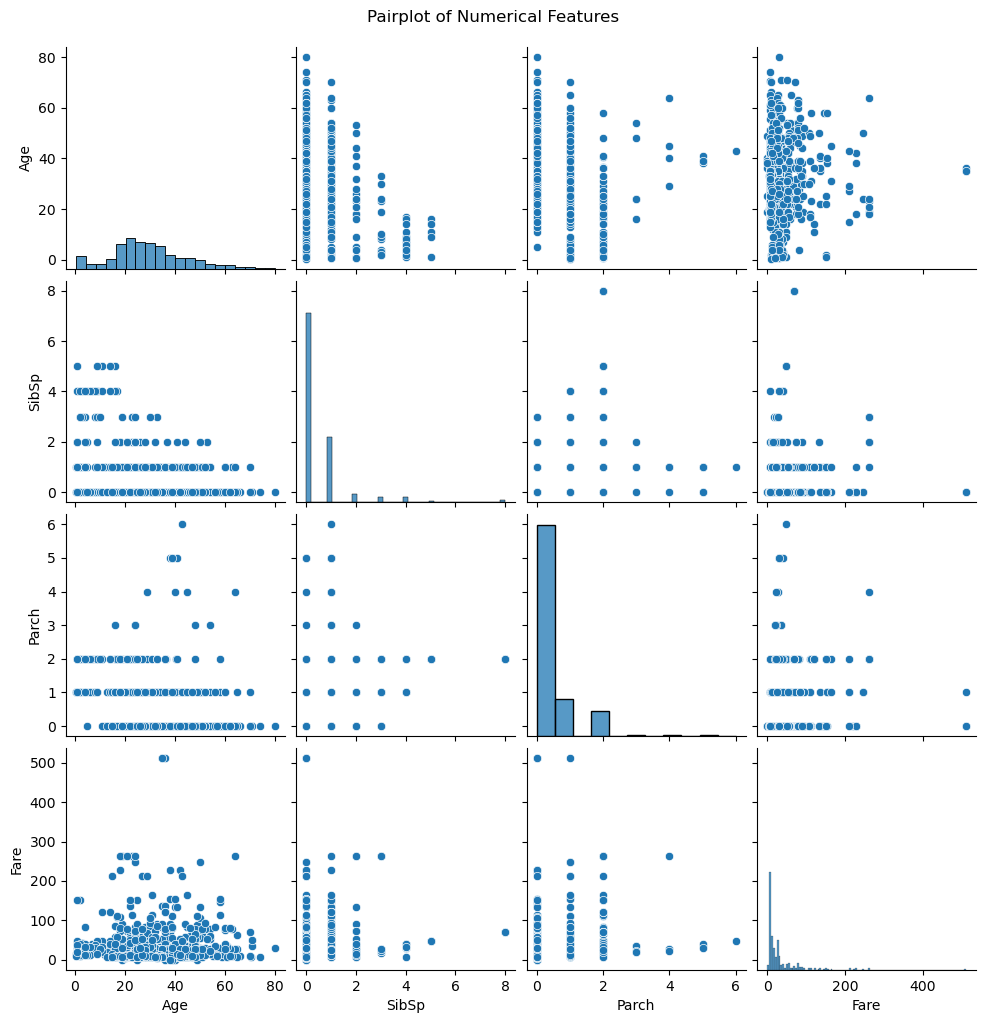

In [17]:
sns.pairplot(a[['Age', 'SibSp', 'Parch', 'Fare']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

Data Cleaning and Feature Engineering

In [18]:
# Filling null value Using Imputation
def sag(name):
    Age=name[0]
    Pclass=name[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
a['Age']=a[['Age','Pclass']].apply(sag,axis=1)
a['Fare']=a['Fare'].round()

In [20]:
gender=pd.get_dummies(a['Sex'],drop_first=True)
gender=gender.astype(int)

In [21]:
a.drop('Sex',axis=1,inplace=True)
a=pd.concat([a,gender],axis=1)

In [22]:
print(a.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare      male
Survived  1.000000 -0.338481 -0.046746 -0.035322  0.081629  0.257088 -0.543351
Pclass   -0.338481  1.000000 -0.411805  0.083081  0.018443 -0.549638  0.131900
Age      -0.046746 -0.411805  1.000000 -0.243877 -0.171917  0.125189  0.078573
SibSp    -0.035322  0.083081 -0.243877  1.000000  0.414838  0.159912 -0.114631
Parch     0.081629  0.018443 -0.171917  0.414838  1.000000  0.215967 -0.245489
Fare      0.257088 -0.549638  0.125189  0.159912  0.215967  1.000000 -0.181962
male     -0.543351  0.131900  0.078573 -0.114631 -0.245489 -0.181962  1.000000


Selection x and y, Model selection and Training

In [23]:
x=a[['Pclass','Age','SibSp','Parch','Fare','male']]
y=a['Survived']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=35)

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)
print(y_pred)

[0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0]


Model Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[139  22]
 [ 23  84]]


In [27]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       161
           1       0.79      0.79      0.79       107

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



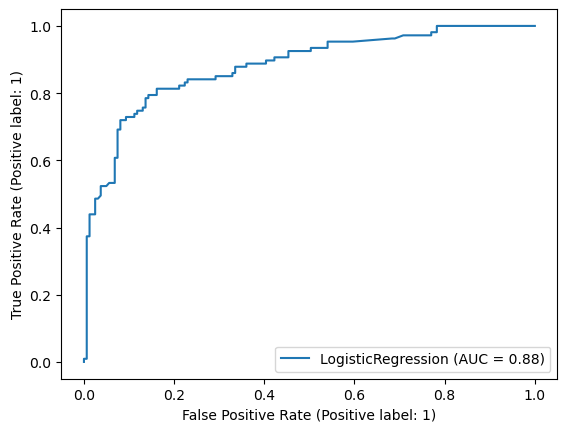

In [28]:
# checking Model Performance Using ROC Cuerve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logmodel,x_test,y_test)
plt.show()

Cross Validation Using Various Algorithms

decision tree accuracy is:  0.7868289637952559
random forest accuracy is:  0.8081148564294631
naive bayes accuracy is:  0.7856554307116104
svm accuracy is:  0.8260549313358302


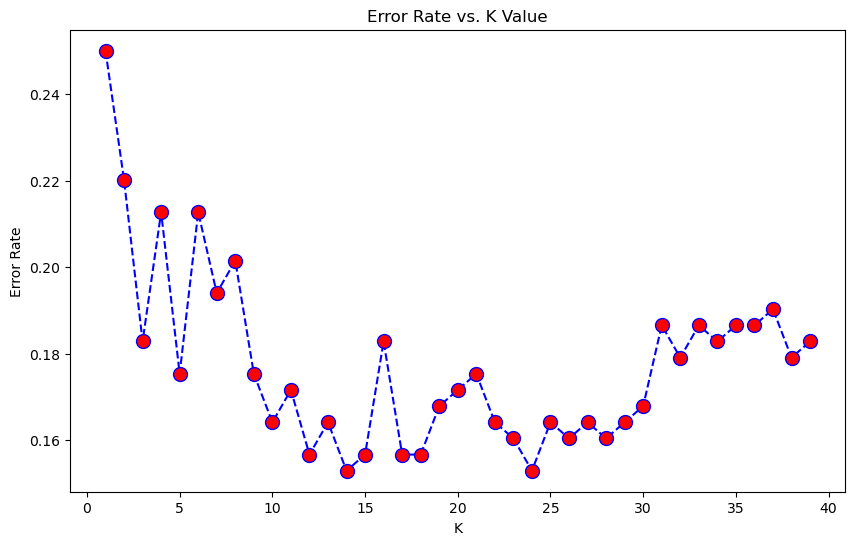

knn accuracy is:  0.8148314606741573


In [29]:
from sklearn.model_selection import cross_val_score

# Normalization of Features Using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
z=scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(z,y,test_size=0.30,random_state=35)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
print('decision tree accuracy is: ',cross_val_score(dt,z,y,cv=10,scoring='accuracy').mean())

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
print('random forest accuracy is: ',cross_val_score(rfc,z,y,cv=10,scoring='accuracy').mean())

from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
print('naive bayes accuracy is: ',cross_val_score(nb,z,y,cv=10,scoring='accuracy').mean())

from sklearn.svm import SVC
svm = SVC()
print('svm accuracy is: ',cross_val_score(svm,z,y,cv=10,scoring='accuracy').mean())

# Checking Best K value Using Evidence Lower Bound Method
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


knn = KNeighborsClassifier(n_neighbors=15)
print('knn accuracy is: ',cross_val_score(knn,z,y,cv=10,scoring='accuracy').mean())

 Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=10, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)

# Get the best hyperparameters and best score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print('Best hyperparameters for Decision Tree:', best_params_dt)
print('Best accuracy for Decision Tree:', best_score_dt)


Best hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best accuracy for Decision Tree: 0.7963645673323093


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

# Get the best hyperparameters and best score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print('Best hyperparameters for Random Forest:', best_params_rf)
print('Best accuracy for Random Forest:', best_score_rf)


Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best accuracy for Random Forest: 0.8090117767537122


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=10, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)

# Get the best hyperparameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print('Best hyperparameters for SVM:', best_params_svm)
print('Best accuracy for SVM:', best_score_svm)


Best hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy for SVM: 0.8123911930363544


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

# Get the best hyperparameters and best score for KNN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print('Best hyperparameters for KNN:', best_params_knn)
print('Best accuracy for KNN:', best_score_knn)

Best hyperparameters for KNN: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best accuracy for KNN: 0.8090885816692268
